In [21]:
####################################################### IMPORTS ###################################################################
from arch import arch_model
import pandas_datareader.data as web
import random
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")


In [3]:
####################################################### DATA EXTRACTION ###################################################################
# datetime date uses the yyyy, mm, dd format
before = int(time.mktime(datetime.date(2018,1,1).timetuple()))# Starting date
today  = int(time.mktime(datetime.datetime.today().timetuple()))# Last date
ticker = 'aapl'
url=f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={before}&period2={today}&interval=1d&events=history&includeAdjustedClose=true"
df = pd.read_csv(url)
df['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in df["Date"]]
#df['returns'] = 100 * df['Adj Close'].pct_change()
df['returns'] = 100*(np.log(df["Adj Close"].shift(1)) - np.log(df["Adj Close"]))
df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,date,returns
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.943363,118071600,2018-01-03,0.017430
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.133545,89738400,2018-01-04,-0.463425
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.601864,94640000,2018-01-05,-1.132101
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.447346,82271200,2018-01-08,0.372112
5,2018-01-09,43.637501,43.764999,43.352501,43.582500,41.442581,86336000,2018-01-09,0.011497
...,...,...,...,...,...,...,...,...,...
1253,2022-12-22,134.350006,134.559998,130.300003,132.229996,132.229996,77852100,2022-12-22,2.405975
1254,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63771000,2022-12-23,0.280204
1255,2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800,2022-12-27,1.397558
1256,2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85323900,2022-12-28,3.116586


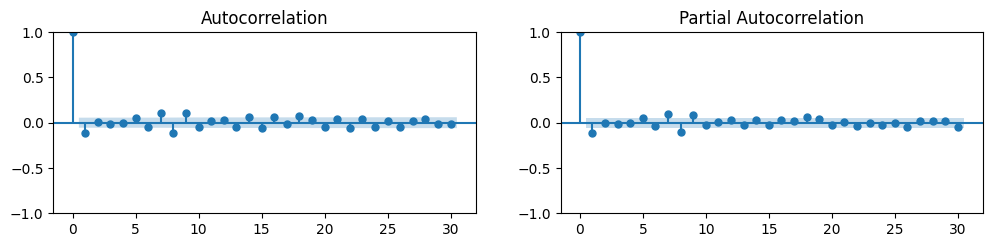

In [4]:
################################################# ACF and PACF to find out the best ARMA model ###################################################################
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(321)
fig = sm.graphics.tsa.plot_acf(df['returns'], lags=30, ax=ax1)
ax2 = fig.add_subplot(322)
fig = sm.graphics.tsa.plot_pacf(df['returns'], lags=30, ax=ax2)

In [5]:
####################################################### ARMA MODELS FITTING ###################################################################

my_arma = (0, 0, 0, 0)
result = []
for i in range(5):
    for j in range(5):
        try:
            arma_model = sm.tsa.arima.ARIMA(df['returns'], order=(i, 0, j)).fit()
            result.append([i, j, arma_model.aic, arma_model.bic])
        except Exception as exception:
            pass
result = pd.DataFrame(result,columns=['p','q',"AIC","BIC"])
print(result)

print("\n######################################################################################################")
print("Using loops or directly the auto_arima function, we see that this time series can be modeled with ARIMA")
print("Best model => ARIMA(2,2)")
print("______________________________________________________________________________________________________")


    p  q          AIC          BIC
0   0  0  5448.970074  5459.243040
1   0  1  5435.358206  5450.767655
2   0  2  5437.328058  5457.873991
3   0  3  5438.923976  5464.606392
4   0  4  5440.751965  5471.570864
5   1  0  5435.338942  5450.748392
6   1  1  5437.315479  5457.861411
7   1  2  5432.323715  5458.006131
8   1  3  5440.898460  5471.717360
9   1  4  5441.040377  5476.995760
10  2  0  5437.322222  5457.868155
11  2  1  5439.256656  5464.939072
12  2  2  5407.463017  5438.281917
13  2  3  5442.609111  5478.564493
14  2  4  5440.201468  5481.293334
15  3  0  5438.930265  5464.612681
16  3  1  5440.921933  5471.740832
17  3  2  5439.994391  5475.949773
18  3  3  5442.239620  5483.331486
19  3  4  5410.960457  5457.188806
20  4  0  5440.876105  5471.695005
21  4  1  5427.091296  5463.046678
22  4  2  5440.119332  5481.211198
23  4  3  5435.650016  5481.878365
24  4  4  5446.354931  5497.719763

#########################################################################################

In [6]:
arma_model = sm.tsa.arima.ARIMA(df['returns'], order=(2, 0, 2)).fit()
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 1257
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2697.732
Date:                Thu, 29 Dec 2022   AIC                           5407.463
Time:                        19:32:59   BIC                           5438.282
Sample:                             0   HQIC                          5419.046
                               - 1257                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0913      0.057     -1.602      0.109      -0.203       0.020
ar.L1         -1.7758      0.030    -58.578      0.000      -1.835      -1.716
ar.L2         -0.9128      0.030    -30.635      0.000      -0.971      -0.854
ma.L1          1.7154      0.039     43.888      0.000       1.639       1.792
ma.L2          0.8364      0.038     22.091      0.000       0.762       0.911
sigma2         4.2812      0.112     38.333      0.000       4.062       4.500
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):               660.72
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                             0.29
Prob(H) (two-sided):                  0.19   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
#################################################### TESTING FOR RESIDUALS NORMALITY ###################################################################
jb = sm.stats.stattools.jarque_bera(df["returns"])
print("Jarque Bera   :" ,jb)
print("Looking at the p-value of the test and the statistic, we reject the null hypothesis of normality.")
print("Coherent since we're dealing with financial data.")
print("_________________________________________________________________________________________________")

################################################### TESTING FOR RESIDUALS HETEROSKEDASTICITY ###################################################################
am = arch_model(df["returns"]*100)
print(am.fit().summary())
print("\nThis test indicates that we need a GARCH model to fit the time series.")
print("______________________________________________________________________")

Jarque Bera   : (1123.9040248693987, 8.858127054224235e-245, 0.23189222748892524, 7.609087983934901)
Looking at the p-value of the test and the statistic, we reject the null hypothesis of normality.
Coherent since we're dealing with financial data.
_________________________________________________________________________________________________
Iteration:      1,   Func. Count:      6,   Neg. LLF: 9415.75887790847
Iteration:      2,   Func. Count:     13,   Neg. LLF: 8380.621178615133
Iteration:      3,   Func. Count:     18,   Neg. LLF: 2550796.7386048627
Iteration:      4,   Func. Count:     26,   Neg. LLF: 8378.054705057548
Iteration:      5,   Func. Count:     31,   Neg. LLF: 8377.995596321496
Iteration:      6,   Func. Count:     36,   Neg. LLF: 8377.994212343809
Iteration:      7,   Func. Count:     41,   Neg. LLF: 8377.994105596175
Iteration:      8,   Func. Count:     46,   Neg. LLF: 8377.99397914779
Iteration:      9,   Func. Count:     51,   Neg. LLF: 8377.993354849646
Iterat

In [8]:
################################################### GARCH MODEL FITTING ####################################################################
import statsmodels.api as sm
result = []
for i in range(4):
    for j in range(4):
        try:
            garch_model = arch_model(df['returns'], vol='Garch', p=i, o=0, q=j, dist='skewt').fit()
            result.append([i, j, garch_model.aic, garch_model.bic])
        except Exception as exception:
            pass

result = pd.DataFrame(result,columns=['p','q',"AIC","BIC"])
#results in the next cell

Iteration:      1,   Func. Count:      7,   Neg. LLF: 6973.651543402846
Iteration:      2,   Func. Count:     16,   Neg. LLF: 9213.592867373514
Iteration:      3,   Func. Count:     25,   Neg. LLF: 16777.095560838206
Iteration:      4,   Func. Count:     33,   Neg. LLF: 3941.4977626834643
Iteration:      5,   Func. Count:     40,   Neg. LLF: 3694.8994931209877
Iteration:      6,   Func. Count:     47,   Neg. LLF: 2614.062137350247
Iteration:      7,   Func. Count:     54,   Neg. LLF: 2606.7622919467995
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2607.6750226018285
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2605.844780788575
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2605.776760764956
Iteration:     11,   Func. Count:     80,   Neg. LLF: 2605.7728836512315
Iteration:     12,   Func. Count:     86,   Neg. LLF: 2605.7728312546096
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2605.772831254614
Optimization terminated successfully    (Exit mode 0)
   

In [9]:
print(result)
print("\nThe analysis of the AIC and BIC components shows that this time serie can be modeled with GARCH.")
print("Best model => GARCH(1,0,1)")
print("___________________________________________________________________________________________________")

    p  q          AIC          BIC
0   1  0  5221.545663  5247.228079
1   1  1  5119.267896  5150.086795
2   1  2  5121.267896  5157.223278
3   1  3  5123.193725  5164.285591
4   2  0  5188.060235  5218.879135
5   2  1  5121.230269  5157.185651
6   2  2  5122.303933  5163.395799
7   2  3  5121.586421  5167.814770
8   3  0  5178.395006  5214.350388
9   3  1  5123.230269  5164.322135
10  3  2  5124.303933  5170.532282
11  3  3  5123.558188  5174.923020

The analysis of the AIC and BIC components shows that this time serie can be modeled with GARCH.
Best model => GARCH(1,0,1)
___________________________________________________________________________________________________


In [10]:
garch_model = arch_model(df['returns'],mean='AR', vol='Garch', p=1, o=0, q=1, dist='skewt').fit()
garch_model.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 7137.504544679114
Iteration:      2,   Func. Count:     19,   Neg. LLF: 53180.19574795624
Iteration:      3,   Func. Count:     29,   Neg. LLF: 77525.07060935994
Iteration:      4,   Func. Count:     38,   Neg. LLF: 2919.165530836879
Iteration:      5,   Func. Count:     47,   Neg. LLF: 2622.1156900493074
Iteration:      6,   Func. Count:     56,   Neg. LLF: 3778.705911442853
Iteration:      7,   Func. Count:     64,   Neg. LLF: 2554.0355907554217
Iteration:      8,   Func. Count:     72,   Neg. LLF: 2553.6891838958063
Iteration:      9,   Func. Count:     80,   Neg. LLF: 2553.636220012596
Iteration:     10,   Func. Count:     87,   Neg. LLF: 2553.6339583065183
Iteration:     11,   Func. Count:     94,   Neg. LLF: 2553.63394808779
Iteration:     12,   Func. Count:    100,   Neg. LLF: 2553.6339480878223
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2553.63394808779
            Iterations: 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 AR - GARCH Model Results                                
=========================================================================================
Dep. Variable:                           returns   R-squared:                       0.000
Mean Model:                                   AR   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -2553.63
Distribution:      Standardized Skew Student's t   AIC:                           5119.27
Method:                       Maximum Likelihood   BIC:                           5150.09
                                                   No. Observations:                 1257
Date:                           Thu, Dec 29 2022   Df Residuals:                     1256
Time:                                   19:33:01   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
Const         -0.1718  4.920e-02     -3.492  4.802e-04 [ -0.268,-7.536e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1557  4.841e-02      3.216  1.300e-03 [6.080e-02,  0.251]
alpha[1]       0.1276  2.601e-02      4.904  9.379e-07 [7.659e-02,  0.179]
beta[1]        0.8436  2.699e-02     31.252 2.070e-214   [  0.791,  0.897]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
eta            5.8358      0.928      6.287  3.239e-10    [  4.016,  7.655]
lambda         0.0290  3.917e-02      0.741      0.459 [-4.776e-02,  0.106]
===========================================================================

Covariance estimator: robust
"""

In [11]:
######################################################## FORECASTS ######################################################################
##################################################### CONSTANT WINDOW ###################################################################

df_const_returns = df[df['date'] <= datetime.datetime.strptime("2022-08-31", '%Y-%m-%d')]

# Use previous ARIMA(2, 0, 2) to predict mu 
predicted_mu = arma_model.forecast(horizon=20).values[0]

# Use previous GARCH(1,1) to predict the variance
pred = garch_model.forecast(horizon=20).variance.dropna().iloc[0][:]
garch_mu = garch_model.forecast(horizon=20).mean.dropna().iloc[0][:]

#Use the variance determined by GARCH model and mu determined by ARMA model to create forecasts
fixed_forecast = predicted_mu + [random.normalvariate(garch_mu[i], pred[i]) for i in range(len(pred))]

print(fixed_forecast)

[ 6.11582375 -1.29815107 -8.48677325 -9.3818502  -0.93007449 -6.35596196
 -1.6311903   2.0060526   0.85466686  8.19958291  1.2780296  -5.70134962
 -4.74143132 -8.91316888 -0.37363656  1.32251701 -6.87417874  2.31211458
  5.52952064  2.46242148]


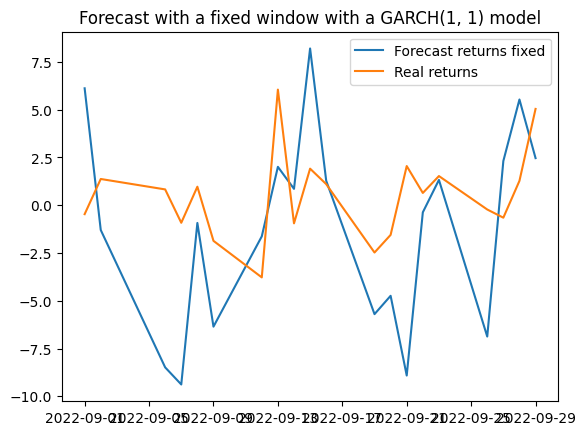

The root mean squared errors are of 515.8112538189553
_________________________________________________________________________________________________


In [12]:
######################################################## FORECASTS PLOT & RMSE ######################################################################

x_axis = df[df['date'] > datetime.datetime.strptime("2022-08-31", '%Y-%m-%d')]
x_axis = x_axis[x_axis['date'] <= datetime.datetime.strptime("2022-09-29", '%Y-%m-%d')]
x_axis = x_axis['date']

real_value = df[df['date'] > datetime.datetime.strptime("2022-08-31", '%Y-%m-%d')]
real_value = real_value[real_value['date'] <= datetime.datetime.strptime("2022-09-29", '%Y-%m-%d')]
real_value = real_value['returns']

plt.plot(x_axis, fixed_forecast, label = 'Forecast returns fixed')
plt.plot(x_axis, real_value, label = 'Real returns')
plt.legend()
plt.title('Forecast with a fixed window with a GARCH(1, 1) model')
plt.show()

#Compute the error between the model and the real values
RMSE = np.sum(np.power(fixed_forecast-real_value,2))
print(f"The root mean squared errors are of {RMSE}")
print("_________________________________________________________________________________________________")

In [13]:
######################################################## FORECASTS ######################################################################
##################################################### EXPANDING WINDOW ##################################################################
first_split_date = datetime.datetime.strptime("2022-08-31", '%Y-%m-%d')
index_ = df.index[df["date"]==first_split_date].tolist()[0]


expanding_forecast = []
for i in range(20):
    # Use the data to predict mu
    df_const_returns = df[df['date'] <= df["date"][index_ + i]]
    arma_model = sm.tsa.arima.ARIMA(df_const_returns['returns'], order=(2, 0, 2)).fit()
    predicted_mu = arma_model.forecast(horizon=1).values[0] #Can take any value as it is constant
    
    #Fit GARCH model
    garch_model = arch_model(df_const_returns['returns'], vol='Garch', p=1, o=0, q=1, dist='skewt').fit()
    pred = garch_model.forecast(horizon=1).variance.dropna().iloc[0][0]
    
    expanding_forecast.append(predicted_mu + random.normalvariate(0, pred))
#results in the next cell

Iteration:      1,   Func. Count:      8,   Neg. LLF: 6538.062733810812
Iteration:      2,   Func. Count:     19,   Neg. LLF: 50282.27259928796
Iteration:      3,   Func. Count:     29,   Neg. LLF: 69676.91710703436
Iteration:      4,   Func. Count:     38,   Neg. LLF: 2798.1414206296204
Iteration:      5,   Func. Count:     47,   Neg. LLF: 2378.922426716774
Iteration:      6,   Func. Count:     56,   Neg. LLF: 3442.282237353613
Iteration:      7,   Func. Count:     64,   Neg. LLF: 2356.527517563898
Iteration:      8,   Func. Count:     71,   Neg. LLF: 2356.4953445011292
Iteration:      9,   Func. Count:     78,   Neg. LLF: 2356.4969010574723
Iteration:     10,   Func. Count:     86,   Neg. LLF: 2356.488863135737
Iteration:     11,   Func. Count:     93,   Neg. LLF: 2356.4885647392657
Iteration:     12,   Func. Count:    100,   Neg. LLF: 2356.488470402919
Iteration:     13,   Func. Count:    106,   Neg. LLF: 2356.488470402961
Optimization terminated successfully    (Exit mode 0)
      

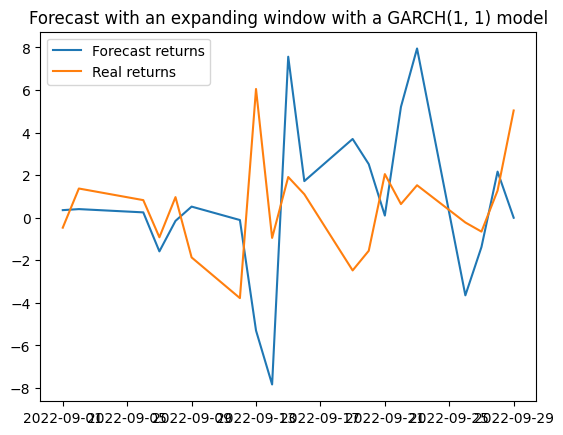

The root mean squared errors are of 390.34707116039743
_________________________________________________________________________________________________


In [14]:
######################################################## FORECASTS PLOT & RMSE ######################################################################

plt.plot(x_axis, expanding_forecast, label = 'Forecast returns')
plt.plot(x_axis, real_value, label = 'Real returns')
plt.legend()
plt.title('Forecast with an expanding window with a GARCH(1, 1) model')
plt.show()

#RMSE
RMSE = np.sum(np.power(expanding_forecast-real_value,2))
print(f"The root mean squared errors are of {RMSE}")
print("_________________________________________________________________________________________________")

In [15]:
######################################################## FORECASTS ######################################################################
##################################################### RECURSIVE WINDOW ##################################################################

last_date = datetime.datetime.strptime("2022-08-31", '%Y-%m-%d')
index_ = df.index[df["date"]==last_date].tolist()[0]
first_date = datetime.datetime.strptime("2022-01-03", '%Y-%m-%d')
index_2 = df.index[df["date"]==first_date].tolist()[0]

recursive_forecast = []
for i in range(20):
    df_const_returns = df[df['date'] <= df["date"][index_ + i]]
    df_const_returns = df_const_returns[df_const_returns['date'] >= df["date"][index_2 + i]]

    # Use the data to predict mu
    df_const_returns = df[df['date'] <= df["date"][index_ + i]]
    arma_model = sm.tsa.arima.ARIMA(df_const_returns['returns'], order=(2, 0, 2)).fit()
    predicted_mu = arma_model.forecast(horizon=1).values[0]   #Can take any value as it is constant

    #Use GARCH model to predict epsilon
    garch_model = arch_model(df_const_returns['returns'], vol='Garch', p=1, o=0, q=1, dist='skewt').fit() #Skewed Student since we're using financial data
    pred = garch_model.forecast(horizon=1).variance.dropna().iloc[0][0]
    recursive_forecast.append(predicted_mu + random.normalvariate(0, pred))


Iteration:      1,   Func. Count:      8,   Neg. LLF: 6538.062733810812
Iteration:      2,   Func. Count:     19,   Neg. LLF: 50282.27259928796
Iteration:      3,   Func. Count:     29,   Neg. LLF: 69676.91710703436
Iteration:      4,   Func. Count:     38,   Neg. LLF: 2798.1414206296204
Iteration:      5,   Func. Count:     47,   Neg. LLF: 2378.922426716774
Iteration:      6,   Func. Count:     56,   Neg. LLF: 3442.282237353613
Iteration:      7,   Func. Count:     64,   Neg. LLF: 2356.527517563898
Iteration:      8,   Func. Count:     71,   Neg. LLF: 2356.4953445011292
Iteration:      9,   Func. Count:     78,   Neg. LLF: 2356.4969010574723
Iteration:     10,   Func. Count:     86,   Neg. LLF: 2356.488863135737
Iteration:     11,   Func. Count:     93,   Neg. LLF: 2356.4885647392657
Iteration:     12,   Func. Count:    100,   Neg. LLF: 2356.488470402919
Iteration:     13,   Func. Count:    106,   Neg. LLF: 2356.488470402961
Optimization terminated successfully    (Exit mode 0)
      

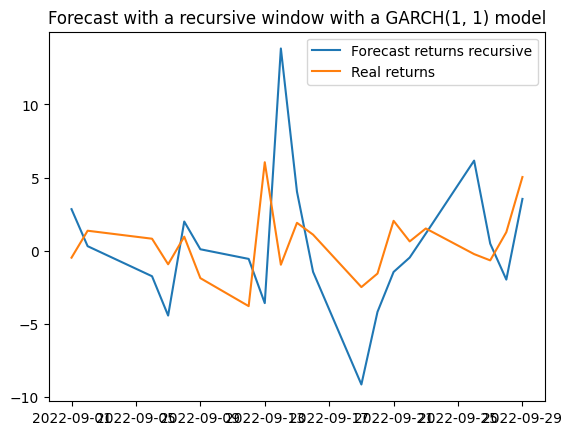

The root mean squared errors are of 487.20224986979343
_________________________________________________________________________________________________

We can notice that even if we're using the ARMA and the GARCH models, it is very difficult to have good forecasts for the financial data.
This is why it is very difficult to model financial data with ATS models.
_________________________________________________________________________________________________


In [16]:
######################################################## FORECASTS PLOT & RMSE ######################################################################

plt.plot(x_axis, recursive_forecast, label = 'Forecast returns recursive')
plt.plot(x_axis, real_value, label = 'Real returns')
plt.legend()
plt.title('Forecast with a recursive window with a GARCH(1, 1) model')
plt.show()

#RMSE
RMSE = np.sum(np.power(recursive_forecast-real_value,2))
print(f"The root mean squared errors are of {RMSE}")
print("_________________________________________________________________________________________________")



print("\nWe can notice that even if we're using the ARMA and the GARCH models, it is very difficult to have good forecasts for the financial data.")
print("This is why it is very difficult to model financial data with ATS models.")
print("_________________________________________________________________________________________________")


In [17]:
################################################## VAR COMPUTATION ###############################################################
##################################################### IN-SAMPLE ##################################################################

df_const_returns = df[df['date'] <= datetime.datetime.strptime("2022-08-31", '%Y-%m-%d')]
df_const_returns = df_const_returns[df_const_returns['date'] > datetime.datetime.strptime("2018-01-02", '%Y-%m-%d')]


#First, we need the mean and volatility of the returns
mean = df_const_returns['returns'].mean()
vol = df_const_returns['returns'].std()
print("mean     :",mean)
print("vol      :",vol)

# Select our confidence interval
conf_level1 = 0.05

# Use SciPy ppf method to generate values for the inverse cumulative distribution function to a normal distribution
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean, vol)
print("cutoff   :",cutoff1)
count = 0
for i in range(len(df_const_returns)):
    if df_const_returns['returns'].iloc[i] < cutoff1:
        count +=1
print(count)
print(f"{round(100 * count / len(df_const_returns), 2)} % of the returns are below the cutoff value : {cutoff1}%")
print("_______________________________________________________________________")
#Not exactly 5% because they are not normally distributed like all financial returns

mean     : -0.11444843155312782
vol      : 2.0818882856583185
cutoff   : -3.538849929125997
41
3.49 % of the returns are below the cutoff value : -3.538849929125997%
_______________________________________________________________________


In [18]:
################################################## VAR COMPUTATION ###############################################################
################################## OUT OF SAMPLE, WITH DIFFERENT FORECAST METHODS ################################################

#Start with fixed window
print("Fixed Window")
#First, we need the mean and volatility of the returns
fixed_forecast = pd.Series(fixed_forecast)
mean = fixed_forecast.mean()
vol = fixed_forecast.std()
print("mean     :",mean)
print("vol      :",vol)

# Select our confidence interval
conf_level1 = 0.05

# Use SciPy ppf method to generate values for the inverse cumulative distribution function to a normal distribution
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean, vol)
print("cutoff   :",cutoff1)
count = 0
for i in range(len(fixed_forecast)):
    if fixed_forecast[i] < cutoff1:
        count +=1
print(f"{round(100 * count / len(df_const_returns), 2)} % of the returns are below the cutoff value :{cutoff1}%")
print("_______________________________________________________________")

################################################################################################################################
#Then with expanding window
print("Expanding Window")
#First, we need the mean and volatility of the returns
expanding_forecast = pd.Series(expanding_forecast)
mean = expanding_forecast.mean()
vol = expanding_forecast.std()
print("mean     :",mean)
print("vol      :",vol)

# Select our confidence interval
conf_level1 = 0.05

# Use SciPy ppf method to generate values for the inverse cumulative distribution function to a normal distribution
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean, vol)
print("cutoff   :",cutoff1)
count = 0
for i in range(len(expanding_forecast)):
    if expanding_forecast[i] < cutoff1:
        count +=1
print(count)
print(f"{round(100 * count / len(df_const_returns), 2)} % of the returns are below the cutoff value :{cutoff1}%")
print("_______________________________________________________________")



################################################################################################################################
#Finally with recursive window
print("Recursive Window")
#First, we need the mean and volatility of the returns
recursive_forecast = pd.Series(recursive_forecast)
mean = recursive_forecast.mean()
vol = recursive_forecast.std()
print("mean     :",mean)
print("vol      :",vol)

# Select our confidence interval
conf_level1 = 0.05

# Use SciPy ppf method to generate values for the inverse cumulative distribution function to a normal distribution
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean, vol)
print("cutoff   :",cutoff1)
count = 0
for i in range(len(recursive_forecast)):
    if recursive_forecast[i] < cutoff1:
        count +=1
print(count)
print(f"{round(100 * count / len(df_const_returns), 2)} % of the returns are below the cutoff value :{cutoff1}%")
print("_______________________________________________________________")

Fixed Window
mean     : -1.2303518480964954
vol      : 5.190892986124095
cutoff   : -9.768611003439675
0.0 % of the returns are below the cutoff value :-9.768611003439675%
_______________________________________________________________
Expanding Window
mean     : 0.6216316949169367
vol      : 3.80641788328771
cutoff   : -5.639368566101801
1
0.09 % of the returns are below the cutoff value :-5.639368566101801%
_______________________________________________________________
Recursive Window
mean     : 0.2789962952995747
vol      : 4.670604286029951
cutoff   : -7.403464104631885
1
0.09 % of the returns are below the cutoff value :-7.403464104631885%
_______________________________________________________________
